## Business Understanding

Hotel ini memiliki masalah pada rasio tingkat kepuasan pelanggan terhadap pelayanan hotel yang mana tingkat kepuasannya masih di bawah 50%.
Dari data yang tersedia kami ingin mengetahui :

Pola data dari pelanggan yang merasa puas dan yang netral atau tidak puas terhadap pelayanan hotel berdasarkan scoring.
dari pola tersebut, kita dapat mengidentifikasi faktor-faktor pelayanan yang mempengaruhi kepuasan pelanggan sehingga pihak hotel dapat meningkatkan pelayanannya, terkhusus kan pada pelanggan pelanggan yang netral adan tidak puas, sehingga pelanggan tersebut pada akhirnya dapat menjadi puas terhadap pelayanan hotel.


## Import Data 

In [15]:
import numpy as np

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('Europe Hotel Booking Satisfaction Score.csv')
data

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


## Data Understanding

In [3]:
data.shape

(103904, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

berdasarkan tampilan tersebut kita mendapatkan informasi bahwa kumpulan data ini memiliki 17 kolom dan 103904 baris yang mana angka pertamanya dimulai dari angka 0. setelah itu kita juga dapat melihat dari 17 kolom tersebut terbagi menjadi 2 tipe data yaitu data objek sebanyak 5 dan data int(number) sebanyak 12 data.

In [5]:
print("Number of unique labels from each column")
print("==="*16)
for x in data.columns:
    print(f"{x} : {len(data[x].unique())} labels")
    print(f"{x} : {data[x].unique()} \n")

Number of unique labels from each column
id : 103904 labels
id : [ 70172   5047 110028 ...  68825  54173  62567] 

Gender : 2 labels
Gender : ['Male' 'Female'] 

Age : 75 labels
Age : [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 

purpose_of_travel : 5 labels
purpose_of_travel : ['aviation' 'tourism' 'business' 'academic' 'personal'] 

Type of Travel : 2 labels
Type of Travel : ['Personal Travel' 'Group Travel'] 

Type Of Booking : 3 labels
Type Of Booking : ['Not defined' 'Group bookings' 'Individual/Couple'] 

Hotel wifi service : 6 labels
Hotel wifi service : [3 2 4 1 5 0] 

Departure/Arrival  convenience : 6 labels
Departure/Arrival  convenience : [4 2 5 3 1 0] 

Ease of Online booking : 6 labels
Ease of Online booking : [3 2 5 4 1 0] 

Hotel location : 6 labels
Hotel location : [1 3 2 5 4 0] 

Food 

In [6]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [7]:
data.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
#Tipe Numeric
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Hotel wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival convenience,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Hotel location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Stay comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0
Common Room entertainment,103904.0,3.358158,1.332991,0.0,2.00,4.0,4.00,5.0
Checkin/Checkout service,103904.0,3.304290,1.265396,0.0,3.00,3.0,4.00,5.0


In [9]:
# Tipe Object
data.describe(include=object).T

,count,unique,top,freq
Gender,103904,2,Female,52727
purpose_of_travel,103904,5,tourism,32053
Type of Travel,103904,2,Group Travel,71655
Type Of Booking,103904,3,Group bookings,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [10]:
data.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [11]:
data.tail()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied
103903,62567,Male,27,academic,Group Travel,Group bookings,1,3,3,3,1,1,1,4,3,1,neutral or dissatisfied


## Data Preparation

In [12]:
# Karena tidak memerlukan kolom id maka kita akan drop kolom id
data.drop('id',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          103904 non-null  object
 1   Age                             103904 non-null  int64 
 2   purpose_of_travel               103904 non-null  object
 3   Type of Travel                  103904 non-null  object
 4   Type Of Booking                 103904 non-null  object
 5   Hotel wifi service              103904 non-null  int64 
 6   Departure/Arrival  convenience  103904 non-null  int64 
 7   Ease of Online booking          103904 non-null  int64 
 8   Hotel location                  103904 non-null  int64 
 9   Food and drink                  103904 non-null  int64 
 10  Stay comfort                    103904 non-null  int64 
 11  Common Room entertainment       103904 non-null  int64 
 12  Checkin/Checkout service      

In [13]:
data.dtypes.value_counts()

int64     11
object     5
Name: count, dtype: int64

In [14]:
data.head()

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [15]:
print(data['Type Of Booking'].value_counts())
print(data['Type Of Booking'].value_counts(normalize=True))

Type Of Booking
Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: count, dtype: int64
Type Of Booking
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: proportion, dtype: float64


jika kita dilihat, jumlah data Not Defined adalah 7494 atau sekitar 7,2%. Oleh karena itu kita dapat memfilter data tersebut 

In [18]:
x_drop = data[data['Type Of Booking'].apply(lambda x: x.startswith('Not defined'))].index
df = df.drop(x_drop)
df = df.reset_index(drop=True)
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

## Jumlah Setiap Pengunjung

In [19]:
print(data['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


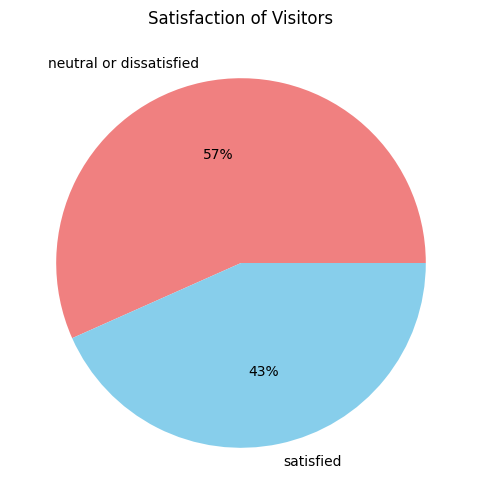

In [20]:
# the value you want to input
satisfaction_count = data['satisfaction'].value_counts()

# definiting the colour
colors=['lightcoral','skyblue']

# Making Pie Chart
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(satisfaction_count, labels = satisfaction_count.index,colors=colors, autopct='%1.0f%%')
ax.set_title('Satisfaction of Visitors')
plt.show()

In [21]:
print(data['purpose_of_travel'].value_counts())

purpose_of_travel
tourism     32053
academic    27219
business    21238
aviation    13846
personal     9548
Name: count, dtype: int64


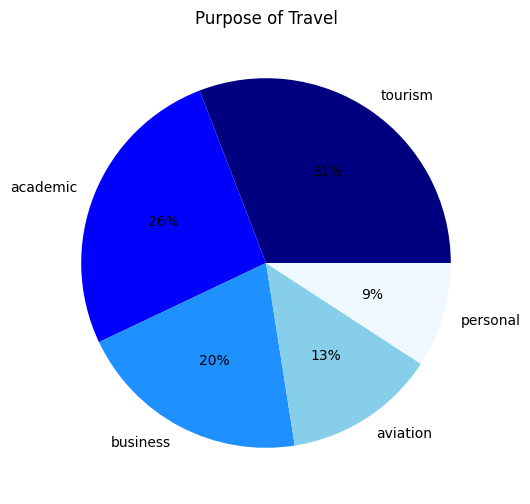

In [22]:
# the value you want to input
purpose_of_travel_count = data['purpose_of_travel'].value_counts()

# definiting the colour
colors=['navy','blue','dodgerblue','skyblue','aliceblue']

#add title and size
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(purpose_of_travel_count, labels = purpose_of_travel_count.index,colors=colors, autopct='%1.0f%%')
ax.set_title('Purpose of Travel')
plt.show()

In [23]:
print(data['Type of Travel'].value_counts())

Type of Travel
Group Travel       71655
Personal Travel    32249
Name: count, dtype: int64


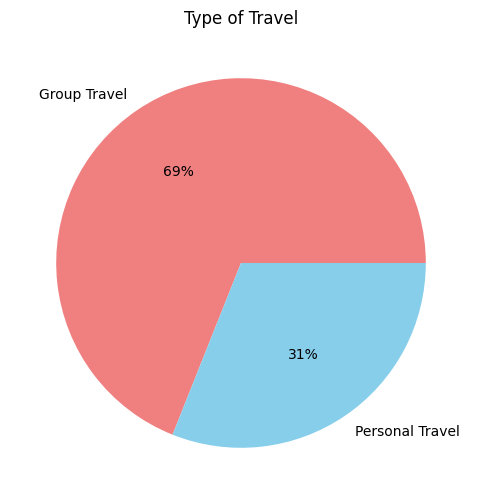

In [24]:
# the value you want to input
type_of_travel_count = data['Type of Travel'].value_counts()

# definiting the colour
colors=['lightcoral','skyblue']

# Making Pie Chart
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(type_of_travel_count, labels = type_of_travel_count.index,colors=colors, autopct='%1.0f%%')
ax.set_title('Type of Travel')
plt.show()

In [25]:
print(data['Gender'].value_counts(normalize=True))

Gender
Female    0.507459
Male      0.492541
Name: proportion, dtype: float64


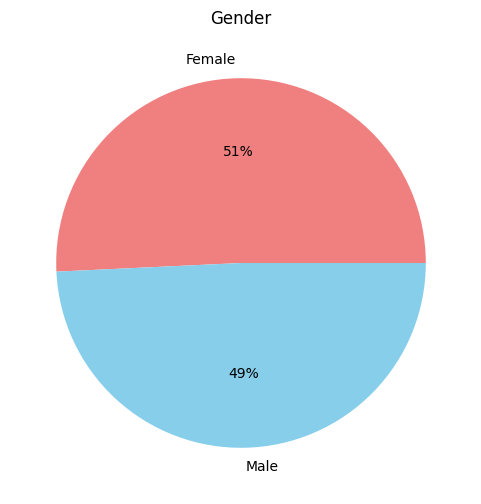

In [26]:
# the value you want to input
gender_count = data['Gender'].value_counts()

# definiting the colour
colors=['lightcoral','skyblue']

# Making Pie Chart
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(gender_count, labels = gender_count.index,colors=colors, autopct='%1.0f%%')
ax.set_title('Gender')
plt.show()

In [27]:
data[['Gender','satisfaction']].value_counts()

Gender  satisfaction           
Female  neutral or dissatisfied    30193
Male    neutral or dissatisfied    28686
Female  satisfied                  22534
Male    satisfied                  22491
Name: count, dtype: int64

In [28]:
print(data['Type Of Booking'].value_counts())

Type Of Booking
Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: count, dtype: int64


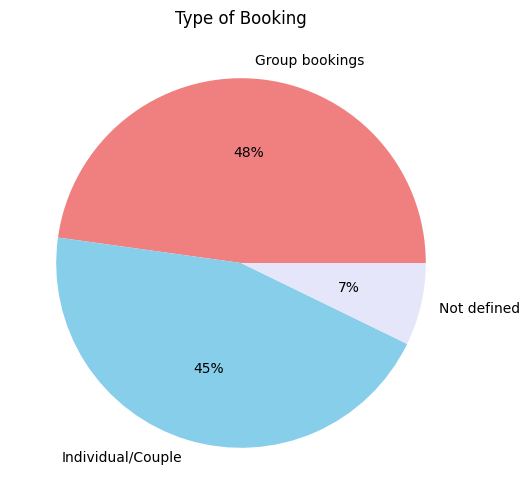

In [29]:
# the value you want to input
type_of_booking_count = data['Type Of Booking'].value_counts()

# definiting the colour
colors=['lightcoral','skyblue','lavender']

# Making Pie Chart
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(type_of_booking_count, labels = type_of_booking_count.index,colors=colors, autopct='%1.0f%%')
ax.set_title('Type of Booking')
plt.show()

## Visualisasi


In [30]:
data_numeric = df.select_dtypes(include=['int64','float64'])
data_numeric

NameError: name 'df' is not defined

In [32]:
#cek outlier
features=data_numeric.columns
plt.figure(figsize=(21,10))

for i in range(0,len(features)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y=data_numeric[features[i]],orient='v') 
    plt.tight_layout()

NameError: name 'data_numeric' is not defined

outlier hanya ada di checkin?checkout service jadi masi tergolong aman dan outlier bisa untuk diabaikan 


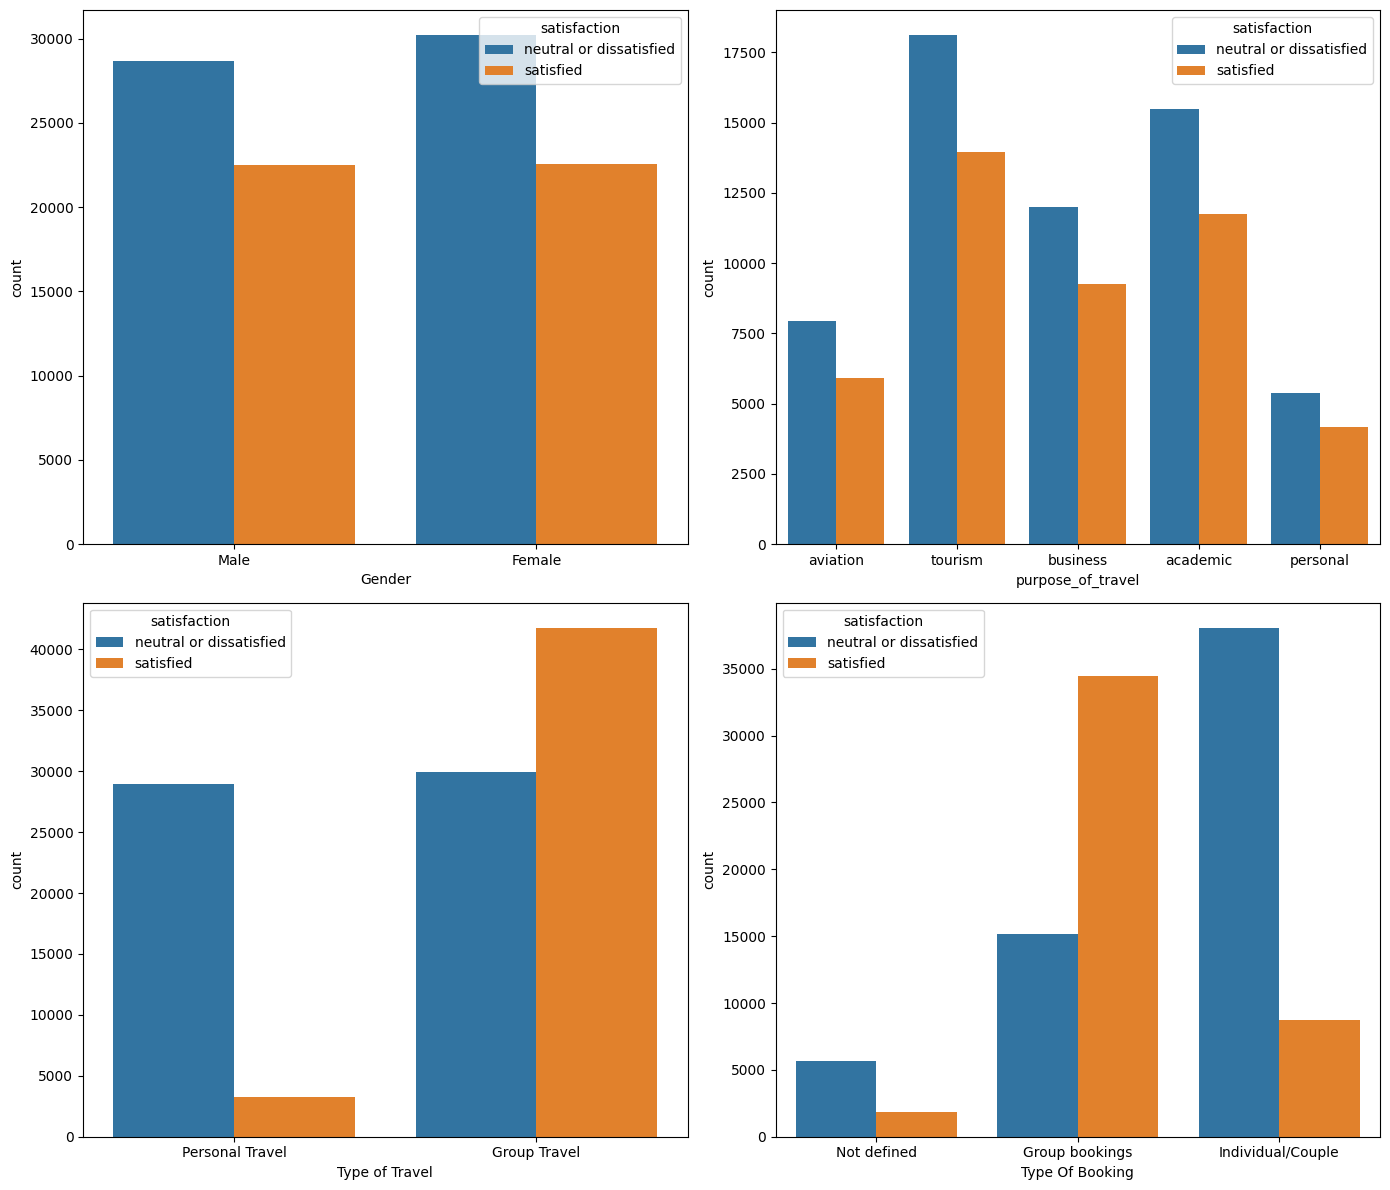

In [33]:
# sns.set(style='darkgrid')
fig, ax = plt.subplots(2,2, figsize=(14, 12))
sns.countplot(data=data, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=data, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=data, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=data, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])
plt.tight_layout();

- di kolom gender terlihat sama dalam masalah puas dan tidak puas 
- di kolom purpose of travel terlihat beragam namun yang tertinggi di bagian tourism dikarenakan mereka lebih banyak dibandingkan dengan yang lain
- di kolom type of travel terlihat jauh perbedaannya namun untuk personal travel mendapatkan nilai kepuasan yang begitu kecil
- di kolom type of booking tingkat kepuasan tertinggi ada pada group sedangkan yang individual cenderung lebih sedikit ini berbanding lurus dengan personal travel

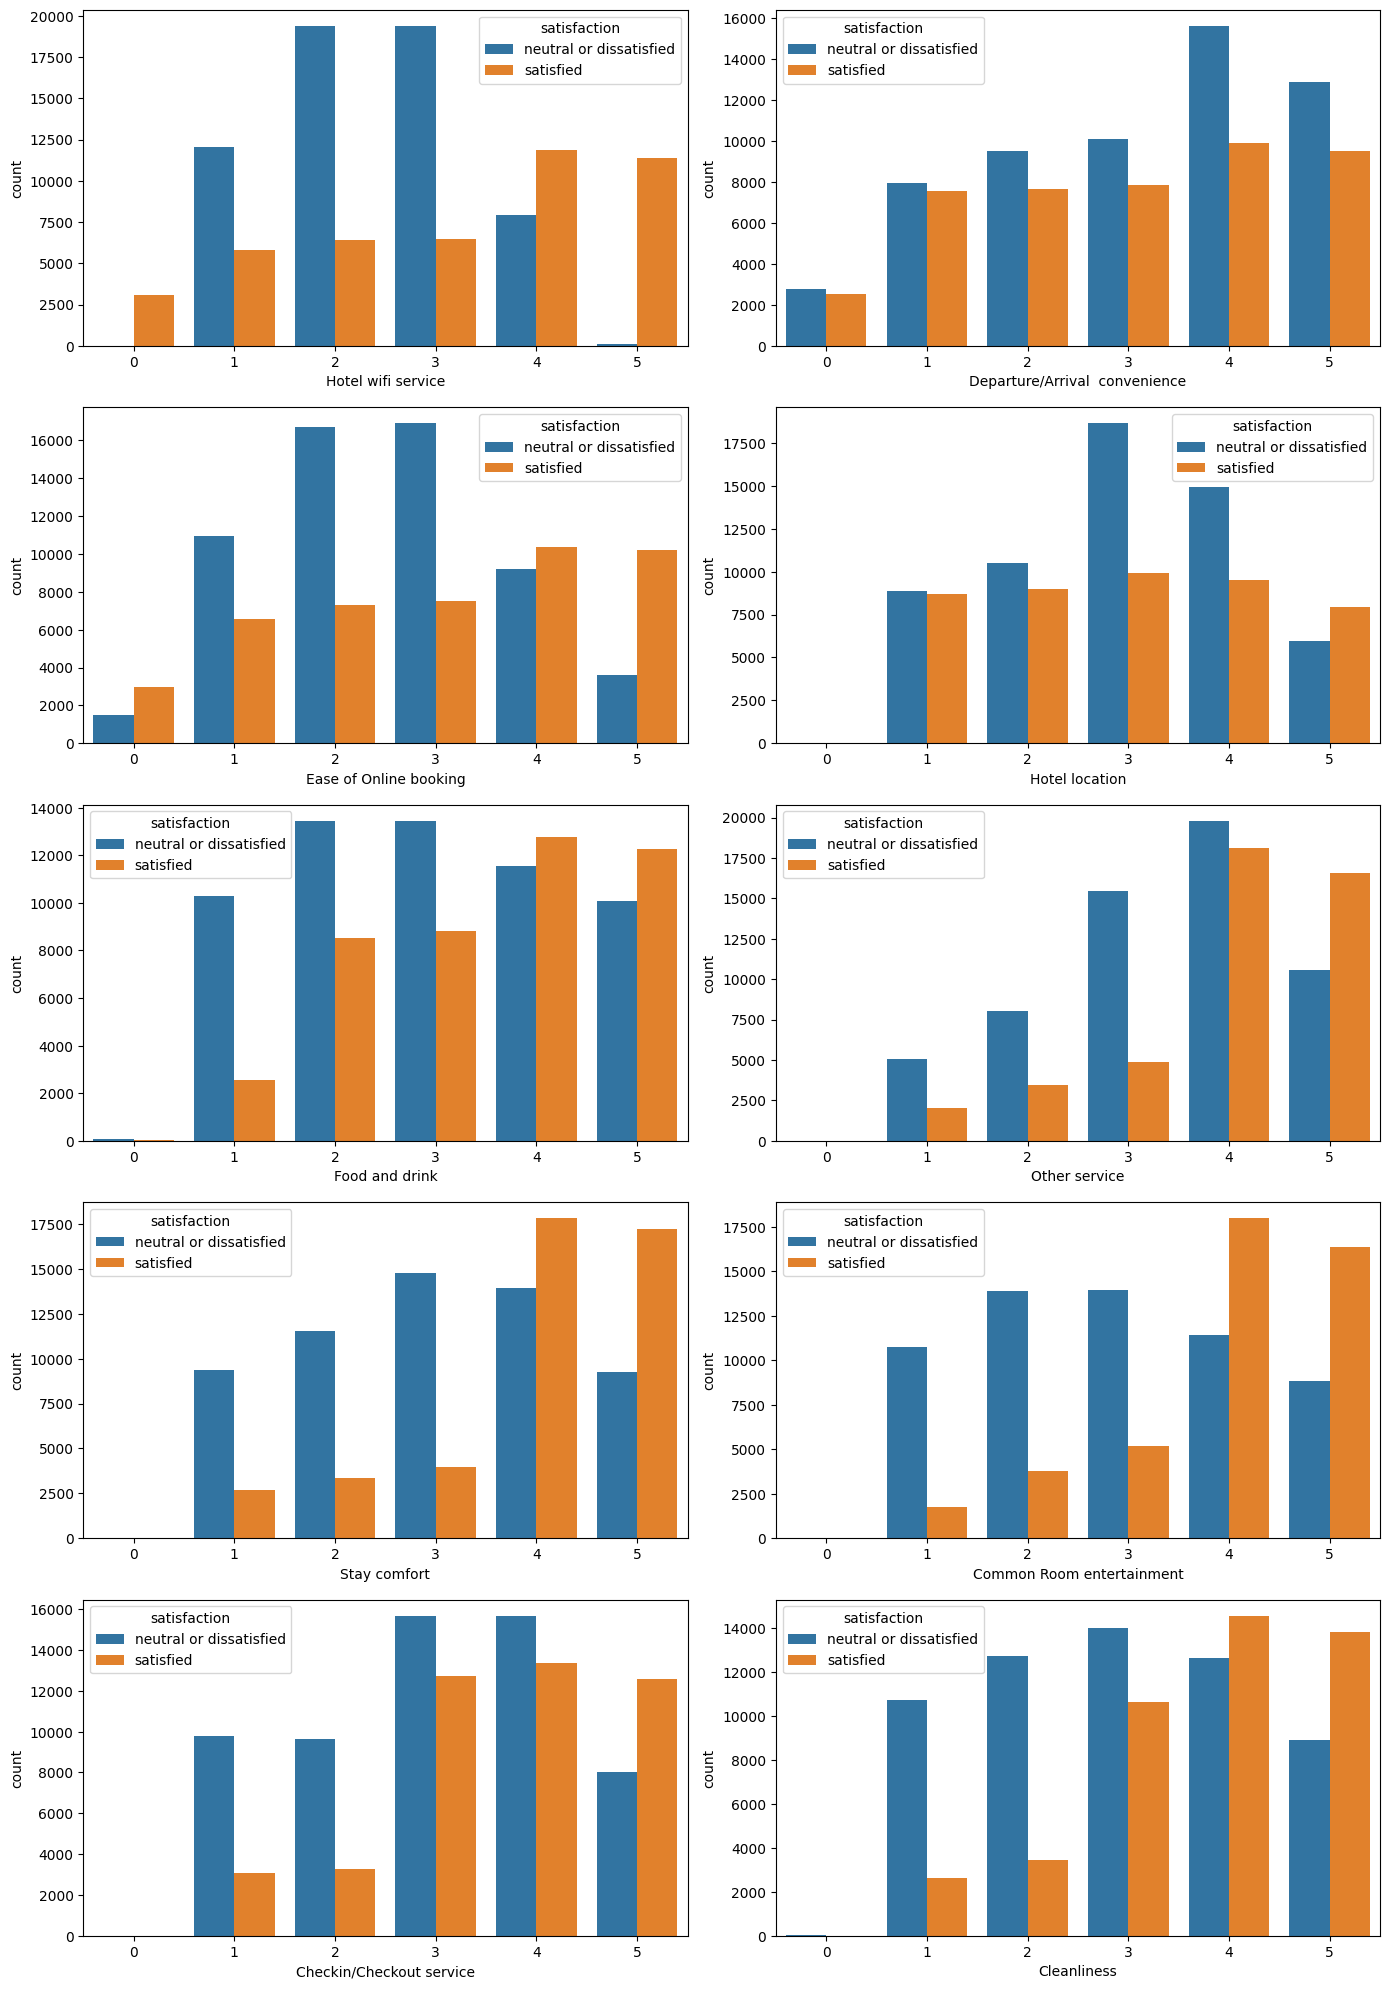

In [34]:
fig, ax = plt.subplots(5,2, figsize=(14, 20))
sns.countplot(data=data, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=data, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=data, x='Ease of Online booking', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=data, x='Hotel location', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=data, x='Food and drink', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=data, x='Other service', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=data, x='Stay comfort', hue='satisfaction', ax=ax[3][0])
sns.countplot(data=data, x='Common Room entertainment', hue='satisfaction', ax=ax[3][1])
sns.countplot(data=data, x='Checkin/Checkout service', hue='satisfaction', ax=ax[4][0])
sns.countplot(data=data, x='Cleanliness', hue='satisfaction', ax=ax[4][1])
plt.tight_layout();

<Axes: xlabel='satisfaction', ylabel='Age'>

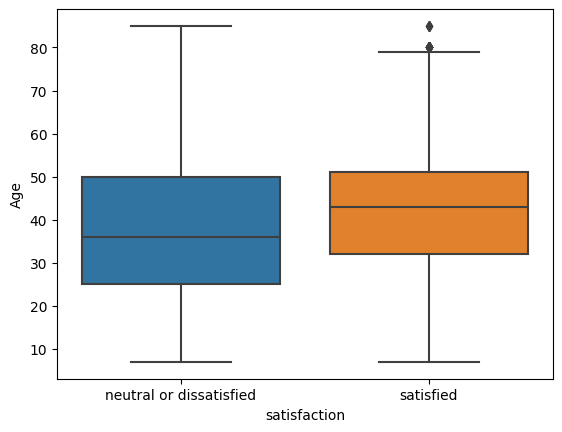

In [35]:
sns.boxplot(data=data, x='satisfaction', y='Age')

In [36]:
variabel=['Hotel wifi service','Departure/Arrival  convenience','Ease of Online booking',
          'Hotel location','Food and drink','Stay comfort','Common Room entertainment','Checkin/Checkout service',
          'Other service','Cleanliness']
variabel_means= data[variabel].mean().sort_values(ascending=False)
print(variabel_means)

Other service                     3.640428
Stay comfort                      3.439396
Common Room entertainment         3.358158
Checkin/Checkout service          3.304290
Cleanliness                       3.286351
Food and drink                    3.202129
Departure/Arrival  convenience    3.060296
Hotel location                    2.976883
Ease of Online booking            2.756901
Hotel wifi service                2.729683
dtype: float64


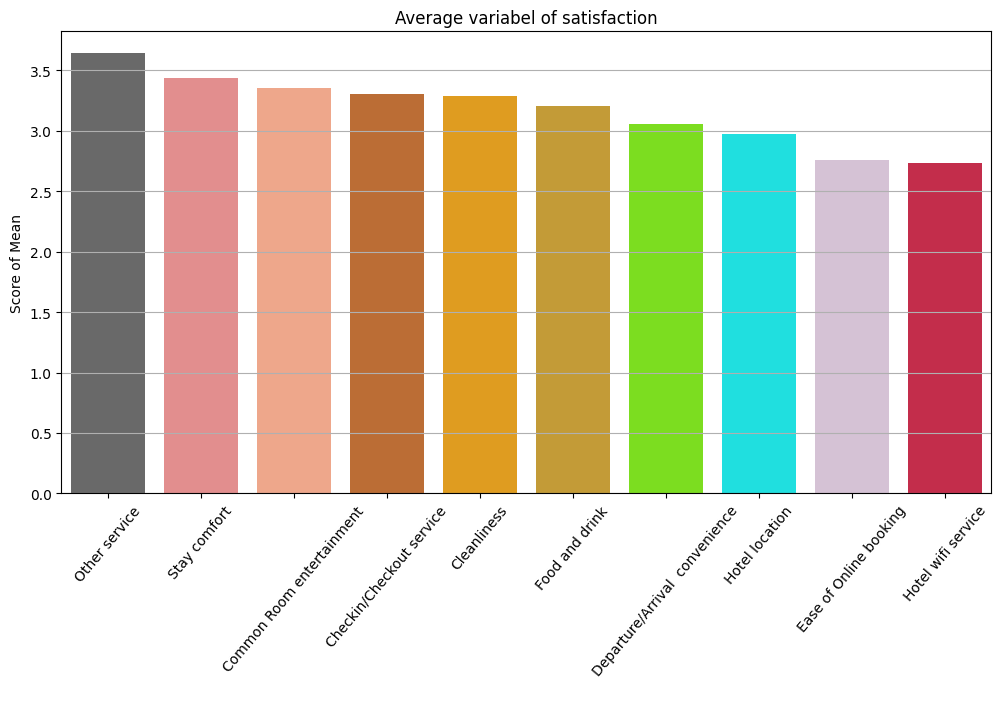

In [37]:
# Definiting the Colors
colors = ['dimgrey','lightcoral','lightsalmon','chocolate','orange',
          'goldenrod','lawngreen','aqua','thistle','crimson']

#making histo chart
plt.figure(figsize=(12,6))
sns.barplot(x= variabel_means.index, y= variabel_means.values, palette = colors)
plt.title('Average variabel of satisfaction')
plt.xticks(rotation=50)
plt.ylabel('Score of Mean')
plt.xlabel(" ")
plt.grid(axis='y')
plt.show()

C:\Users\M Haidi Nurrahman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\M Haidi Nurrahman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\M Haidi Nurrahman\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\M Haid

<Axes: xlabel='Age', ylabel='Count'>

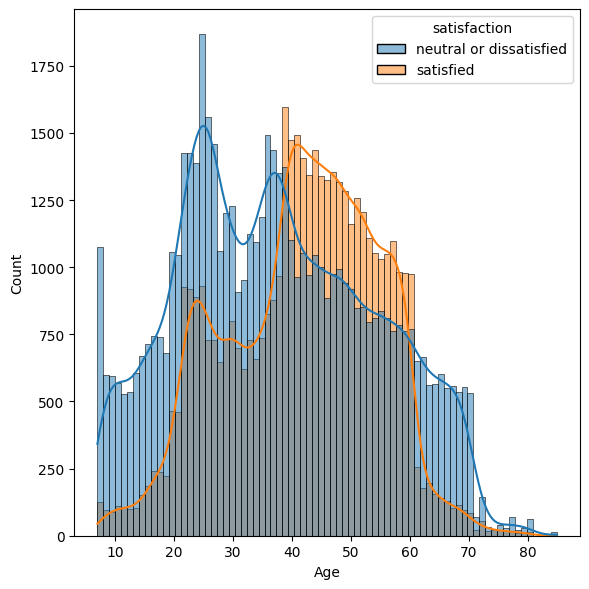

In [38]:
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = data, x = "Age", kde = True, hue = "satisfaction")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Hotel wifi service'),
  Text(0, 2.5, 'Departure/Arrival  convenience'),
  Text(0, 3.5, 'Stay comfort'),
  Text(0, 4.5, 'Food and drink'),
  Text(0, 5.5, 'Common Room entertainment'),
  Text(0, 6.5, 'Checkin/Checkout service'),
  Text(0, 7.5, 'Other service'),
  Text(0, 8.5, 'Cleanliness')])

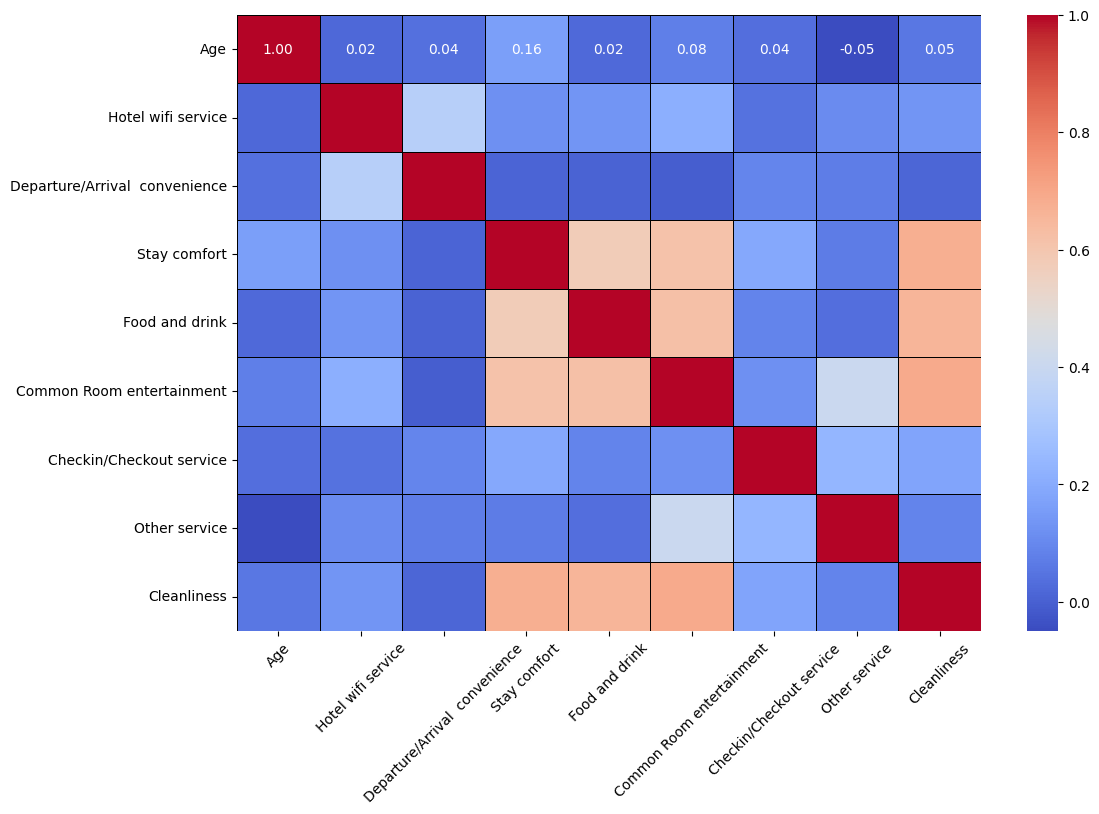

In [17]:
plt.figure(figsize=(12,8))
corr = data[['Age','Hotel wifi service','Departure/Arrival  convenience', 
           'Stay comfort','Food and drink', 'Common Room entertainment','Checkin/Checkout service', 
           'Other service', 'Cleanliness']].corr(numeric_only=True)
sns.heatmap(corr, annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5, linecolor='black')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

In [40]:
df.info()

NameError: name 'df' is not defined

In [41]:
corr = df[['Age','Gender', 'Hotel wifi service', 'Departure/Arrival  convenience', 
           'Stay comfort','Food and drink', 'Common Room entertainment', 'Checkin/Checkout service', 
           'Other service', 'Cleanliness','satisfaction']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

NameError: name 'df' is not defined

In [ ]:
df.head()